##**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

##**Load Data**

In [ ]:
#Loading data to a data frame
df = pd.read_csv('coffee_sales.csv')

##**Data Preparation and Cleaning**

In [ ]:
#To show the first five entries of the data frame
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
#To show the summary of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


There are 1133 columns with 6 rows and no null values except in card. 1044 card type payments with 89 missing values.

In [ ]:
#To print the summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


##**Handling Missing Values**

In [ ]:
#To find the null values
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


There are 89 missing values in the column card.

In [ ]:
#To find the duplicate entries
df.duplicated().sum()

0

There are no duplicated values in the dataset.

In [ ]:
#To find the count of method of payment mode (card or cash) and to find the no. of sold coffee by coffee name
cat_cols  = ['cash_type', 'coffee_name']
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("=============================")

Column: cash_type
cash_type
card    1044
cash      89
Name: count, dtype: int64
Column: coffee_name
coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


The 89 missing values in the column card was the payment made by in cash. The transactions, primarily made via card payments, totaling 10,44 entries compared to 89 for cash.

The number of cups sold for various coffee types, with 'Americano with Milk' leading in sales, followed by 'Latte', 'Cappuccino', 'Americano','Cortado', Hot Chocolate, Espresso, and Cocoa

In [ ]:
#To show the various columns
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

##**Adding Seperate columns for Time, Hour, Day, Week and Month**

In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["time"] = df["datetime"].dt.time
df["date"] = pd.to_datetime(df["date"])
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["month"] = df["date"].dt.to_period("M")
df["week"] = df["date"].dt.to_period("W")
df.head()

,date,datetime,cash_type,card,money,coffee_name,time,hour,day,month,week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520000,10,1,2024-03,2024-02-26/2024-03-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539000,12,1,2024-03,2024-02-26/2024-03-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089000,12,1,2024-03,2024-02-26/2024-03-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006000,13,1,2024-03,2024-02-26/2024-03-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626000,13,1,2024-03,2024-02-26/2024-03-03


In [ ]:
[df['date'].min(),df['date'].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00')]

The dataset spans from March 1, 2024, to July 31, 2024,

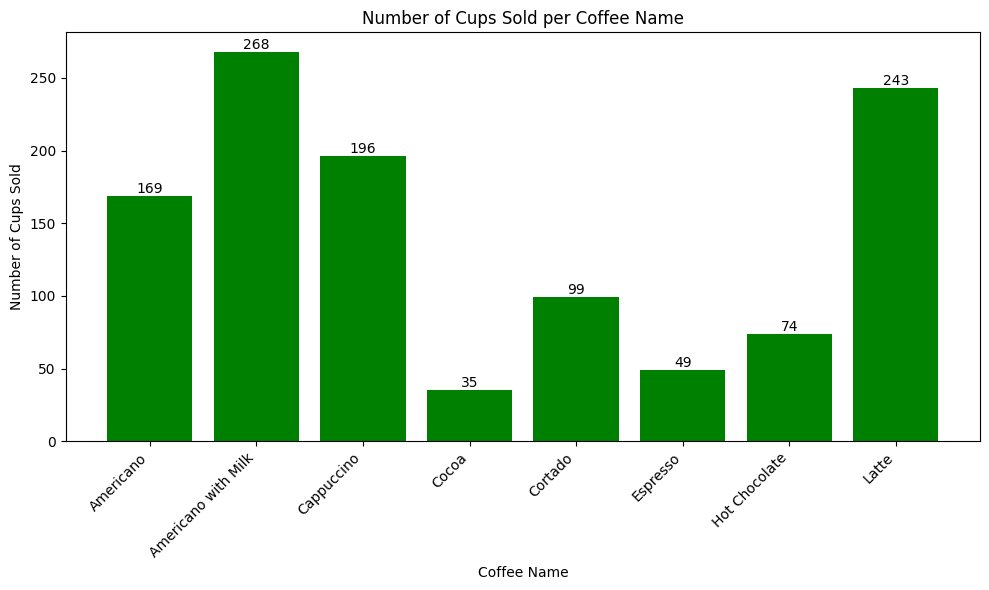

In [ ]:
coffee_sales_count = df.groupby('coffee_name')['money'].count()

plt.figure(figsize=(10, 6))
plt.bar(coffee_sales_count.index, coffee_sales_count.values, color='green')
plt.xlabel('Coffee Name')
plt.ylabel('Number of Cups Sold')
plt.title('Number of Cups Sold per Coffee Name')
plt.xticks(rotation=45, ha='right')
# Add labels on top of bars
for i, v in enumerate(coffee_sales_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

The bar chart visualizes the number of cups sold for various coffee types, with 'Americano with Milk' leading the sales at 268 cups, followed by 'Latte' (243 cups), 'Cappuccino' (196 cups), 'Americano' (169 cups), 'Cortado' (99 cups), 'Hot Chocolate' (74 cups), 'Espresso' (49 cups) and 'Cocoa' (35 cups) . This data highlights the popularity of these coffee types among customers.

In [ ]:
#To find the total payment done by card and cash
cash_type_counts = df.groupby('cash_type')['money'].sum()
print(cash_type_counts)

cash_type
card    34322.88
cash     3186.00
Name: money, dtype: float64


There were 1,044 transactions made via card, generating a total revenue of $34,322.88, compared to only 89 transactions that totaled 3186. This significant difference suggests that customers favor the convenience of card payments.

In [ ]:
#Total Money
Total_Money = round(df['money'].sum(), 2)
print('Total_Money:', Total_Money)

Total_Money: 37508.88


The total sales for the coffee shop over the given timeframe March 1, 2024, to July 31, 2024, amounted to $37,508.88.

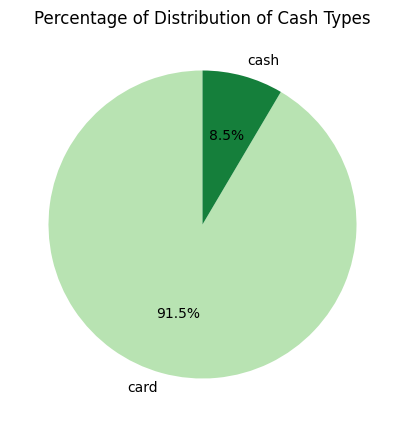

In [ ]:
# Create a pie chart to show the percentage of distribution of cash types
color = plt.cm.Greens(np.linspace(0.3, 0.8, 2))
plt.figure(figsize=(5, 5))
plt.pie(cash_type_counts, labels=cash_type_counts.index, autopct='%1.1f%%', startangle=90, colors =color )
plt.title('Percentage of Distribution of Cash Types')
plt.show()


Most customers prefer to pay by card, as shown by card payments making up 91.5% of total sales. Cash payments represent a much smaller portion, only 8.5%.

##**Total Sales Generated During the Analyzed Period**

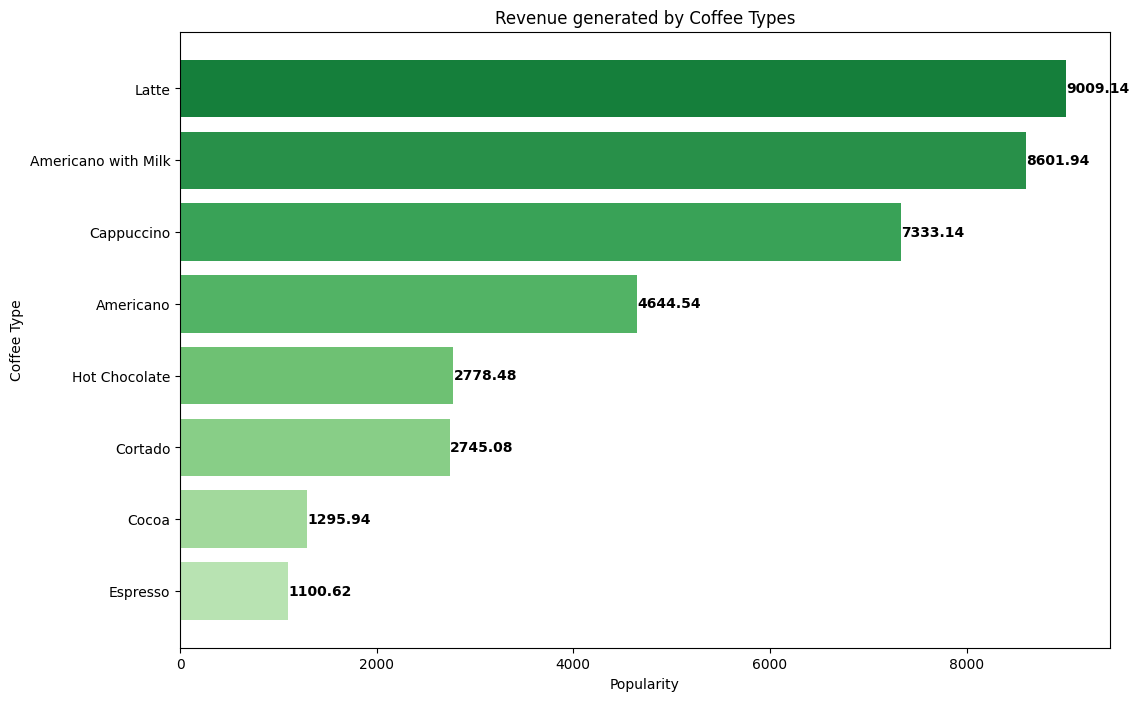

In [ ]:
# Group the data by coffee name and count the occurrences
coffee_popularity = df.groupby('coffee_name')['money'].sum()
coffee_popularity_sorted = coffee_popularity.sort_values()

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
colors = plt.cm.Greens(np.linspace(0.3, 0.8, len(coffee_popularity_sorted)))
plt.barh(coffee_popularity_sorted.index, coffee_popularity_sorted.values, color=colors)
plt.xlabel('Popularity')
plt.ylabel('Coffee Type')
plt.title('Revenue generated by Coffee Types')
# Add values to the bars
for i, v in enumerate(coffee_popularity_sorted.values):
    plt.text(v + 3, i, str(round(v,2)), color='black', fontweight='bold', va='center')
plt.show()

Coffee type generating the most sales
aggregated sales data analysis based on the aggregated sales data provided, the coffee types and their respective sales amounts are as follows:

1. Latte: 9009.14
2. Americano with Milk: 8601.94
3. Cappuccino: 7333.14
4. Americano: 4644.54
5. Hot Chocolate: 2778.48
6. Cortado: 2745.08
7. Cocoa:1295.94
8. Espresso:1100.62

The Latte generates the most sales, with a total amount of $9009.14. This is followed closely by Americano with Milk and Cappuccino.

Latte is the top-selling coffee type, indicating a strong preference among customers.
Americano with Milk and Cappuccino also show significant sales, suggesting they are popular choices as well when compared to other coffee types with lower sales figures.


##**Monthly Sales Analysis**

In [ ]:
monthly_sales_count = df.groupby(['month', 'coffee_name'])['money'].count().unstack(fill_value=0).reset_index()
monthly_sales_total = df.groupby('month')['money'].sum().reset_index()
monthly_sales_final = pd.merge(monthly_sales_count, monthly_sales_total, on='month')
monthly_sales_final = monthly_sales_final.rename(columns={'money': 'Total Sales'})
monthly_sales_final

,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,Total Sales
0,2024-03,36,34,20,6,30,10,22,48,7050.20
1,2024-04,35,42,43,6,19,7,13,31,6720.56
2,2024-05,48,58,55,9,17,8,14,58,9063.42
3,2024-06,14,69,46,5,19,10,14,50,7758.76
4,2024-07,36,65,32,9,14,14,11,56,6915.94


This table shows the number of each type of coffee sold every month, and the total revenue for that month.

●	March: Latte was the most popular coffee (48 cups sold), while Cocoa had the fewest sales (6 cups sold).

●	April: Americano with Milk was the top seller (42 cups sold).

●	May: Americano with Milk and Latte were equally popular, with 58 cups of each sold. Espresso had the lowest sales this month (8 cups sold).

●	June: Americano with Milk was the best-selling coffee (69 cups), achieving the highest sales not only for the month but also across the entire period. Cocoa had the lowest sales of 5 cups.

●	July: Americano with Milk continued its popularity with 65 cups sold. Cocoa remained the least popular with only 9 cups sold.

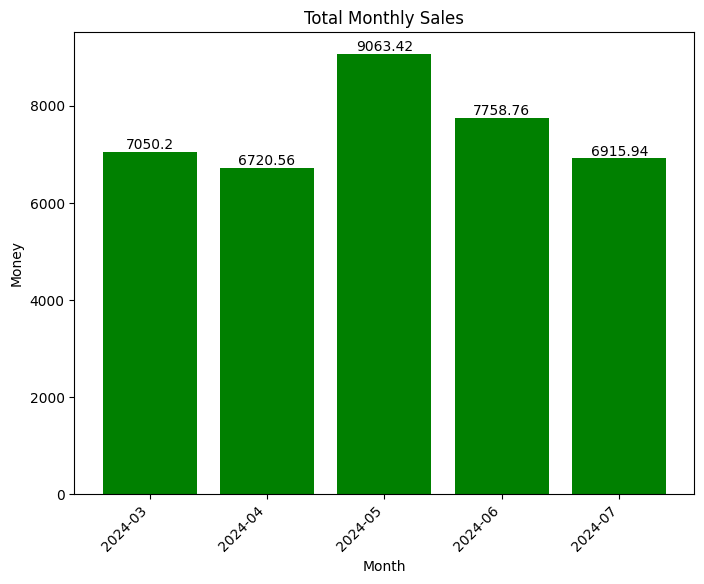

In [ ]:
# Convert 'month' column to string representation
monthly_sales_final['month'] = monthly_sales_final['month'].astype(str)

plt.figure(figsize=(8, 6))
bars = plt.bar(monthly_sales_final['month'], monthly_sales_final['Total Sales'], color='green')
plt.xlabel('Month')
plt.ylabel('Money')
plt.title('Total Monthly Sales')
plt.xticks(rotation=45, ha='right')
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()


●	Highest Total Sales: In May 2024 ($9063.42)

●	Second Highest Sales: In June 2024 ($7758.76)

●	Lowest Total Sales: In April 2024 ($6720.56)

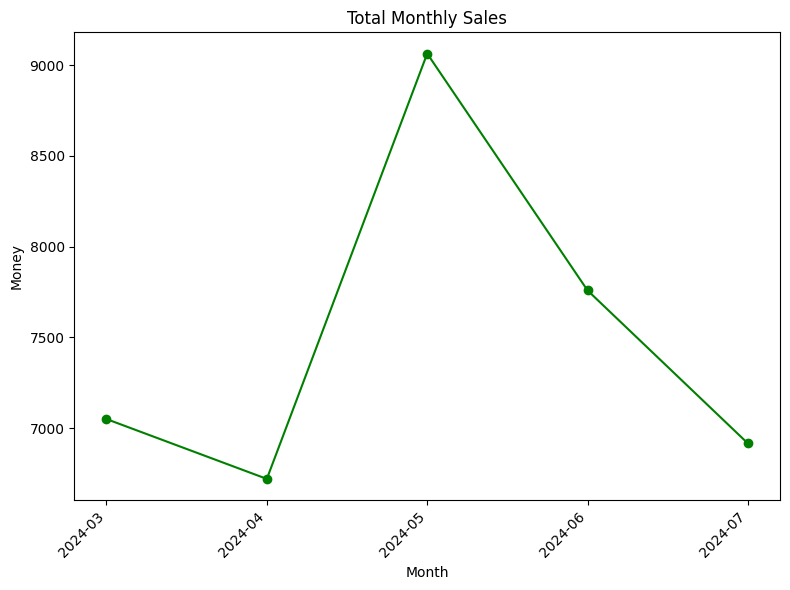

In [ ]:
monthly_sales_final['month'] = monthly_sales_final['month'].astype(str)

plt.figure(figsize=(8, 6))
plt.plot(monthly_sales_final['month'], monthly_sales_final['Total Sales'], color='green', marker='o')
plt.xlabel('Month')
plt.ylabel('Money')
plt.title('Total Monthly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

●	The coffee sales show a fluctuating trend over the months from March to July 2024.

●	Peak Sales: The highest sales are observed in May ($9063.42).

●	Lowest Sales: The lowest sales are observed in April ($6720.56).

● There is an initial decline from March to April, followed by a sharp increase in May, and then a gradual decline in June and July.




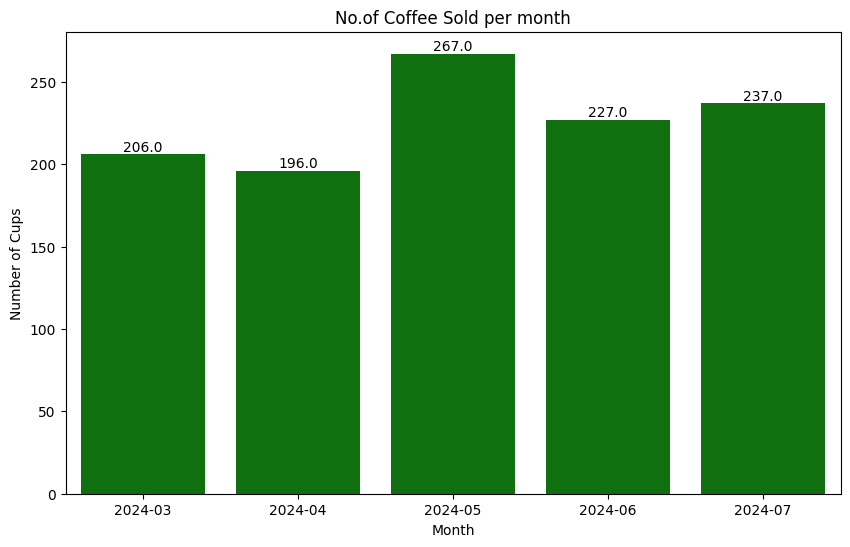

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = df['month'], color='green')
plt.title('No.of Coffee Sold per month')
plt.xlabel('Month')
plt.ylabel('Number of Cups')
# Iterate through the bars and label them
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
plt.show()

● The highest number of coffees were sold in May, with a total of 267 cups.

● July had the second highest sales, with 237 cups sold.

● April had the lowest sales, with only 196 cups of coffee sold.

In [ ]:
monthly_sales_count.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0



●	Highest Sales Count: Americano with Milk in July 2024 (69 cups), was the most popular drink.

●	Lowest Sales Count: Cocoa in June 2024 (5 cups), Cocoa exhibited the lowest sales volume, with a total of 5 cups sold.

●	Cocoa, Espresso and Hot Chocolate are the least prefered coffee in average over the period.



##**Weekly Sales Analysis**

In [ ]:
df_by_month = df.groupby("week").agg({"money": ["sum", "count"]}).reset_index()
df_by_month.columns = ["week", "money", "cups"]
df_by_month

,week,money,cups
0,2024-02-26/2024-03-03,973.50,28
1,2024-03-04/2024-03-10,1840.50,53
2,2024-03-11/2024-03-17,1516.30,47
3,2024-03-18/2024-03-24,1307.80,38
4,2024-03-25/2024-03-31,1412.10,40
5,2024-04-01/2024-04-07,1434.50,42
6,2024-04-08/2024-04-14,1666.00,48
7,2024-04-15/2024-04-21,1838.84,53
8,2024-04-22/2024-04-28,1251.20,37
9,2024-04-29/2024-05-05,890.18,26


Index(['week', 'money', 'cups'], dtype='object')


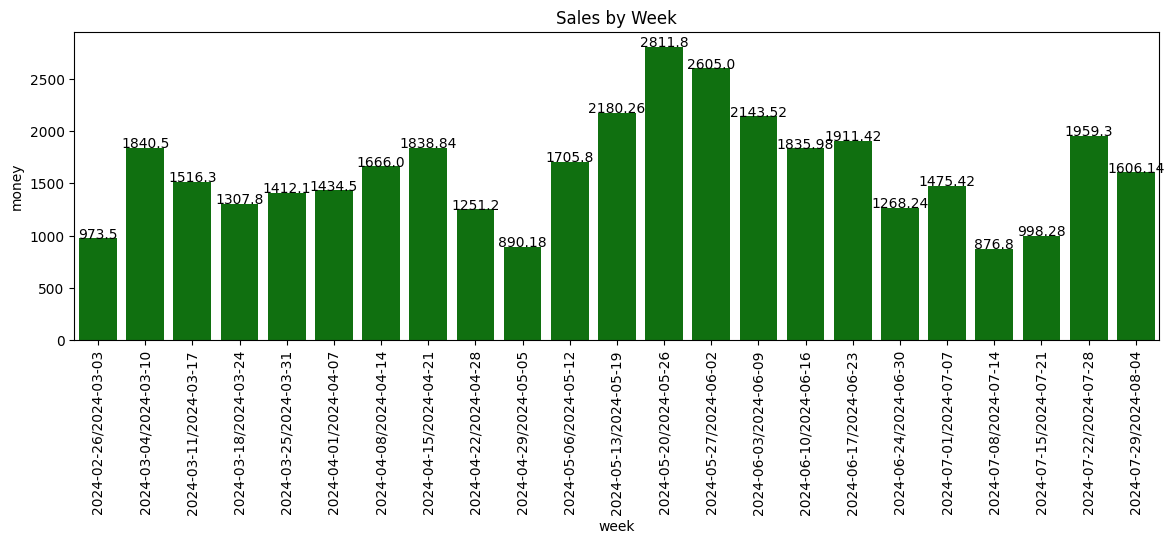

In [ ]:
plt.figure(figsize=(14, 4))
# Verify the column names in your DataFrame
print(df_by_month.columns)
# If 'week' is present, use it. Otherwise, replace 'week' with the correct column name.
ax = sns.barplot(df_by_month, y="money", x="week", color="green")
plt.title("Sales by Week")
plt.xticks(rotation=90)

# Iterate over the bars and add text labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, round(height, 2), ha="center")

plt.show()

The highest weekly sales, $2811.8, were recorded between May 20th and May 26th.

Conversely, the lowest weekly sales, $876.8, occurred between July 8th and July 14th.

##**Daily Sales Analysis**

In [ ]:
df['day_of_week'] = df['date'].dt.day_name()
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_purchases = df.groupby('day_of_week')['coffee_name'].count().reindex(day_order)
daily_purchases

,coffee_name
day_of_week,
Sunday,151
Monday,151
Tuesday,185
Wednesday,165
Thursday,164
Friday,163
Saturday,154


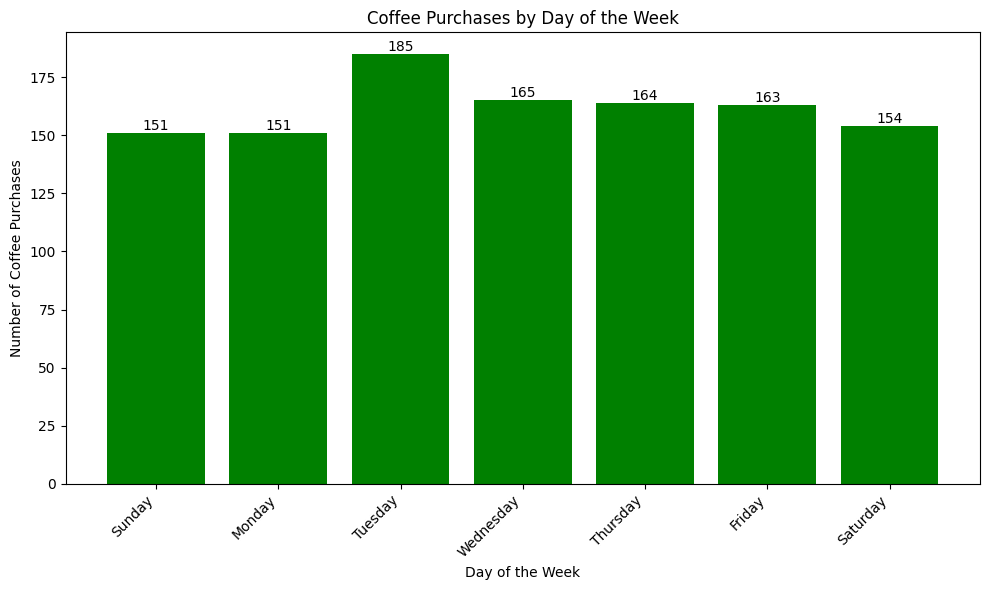

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(daily_purchases.index, daily_purchases.values, color='green')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Coffee Purchases')
plt.title('Coffee Purchases by Day of the Week')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(daily_purchases.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


● Tuesday had the highest number of coffee sales, with 185 cups sold.

● Wednesday and Thursday followed, with 165 and 164 cups sold respectively.

● Sunday and Monday had the lowest sales, both with 151 cups sold.


In [ ]:
df['day'] = df['date'].dt.day # Extract day of the month from 'date' column
daily_sales = df.groupby('day')['money'].sum()

# Continue with the rest of your code
daily_sales_df = daily_sales.reset_index(name='Sales Amount')
daily_sales_df.style.set_properties(**{'text-align': 'left'})
daily_sales_df = daily_sales.to_frame().transpose()
daily_sales_df

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
money,1124.36,1015.14,1151.82,855.12,1314.38,1174.5,1301.4,919.2,1541.84,856.52,...,1012.46,1553.14,1112.76,1010.48,1861.92,1179.38,904.56,1419.24,1614.84,1202.5


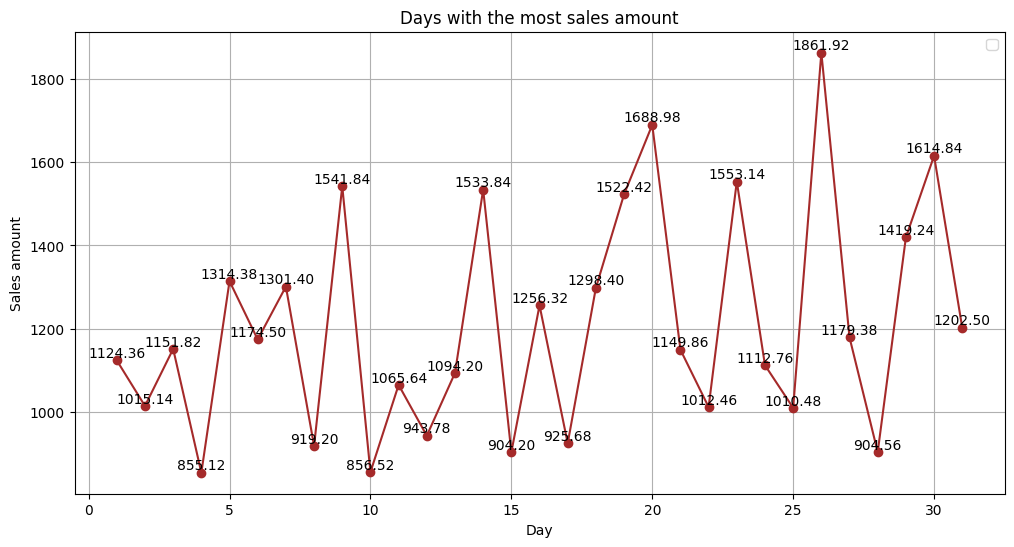

In [ ]:
plt.figure(figsize = (12, 6))
daily_sales = df.groupby('day')['money'].sum()
plt.plot(daily_sales.index, daily_sales.values, color="brown", marker='o')
plt.title('Days with the most sales amount')
plt.xlabel('Day')
plt.ylabel('Sales amount')

# Mark the top values for each day
for day, sales in daily_sales.items():
    plt.text(day, sales, f'{sales:.2f}', ha='center', va='bottom')
plt.grid(True)
plt.legend()
plt.show()

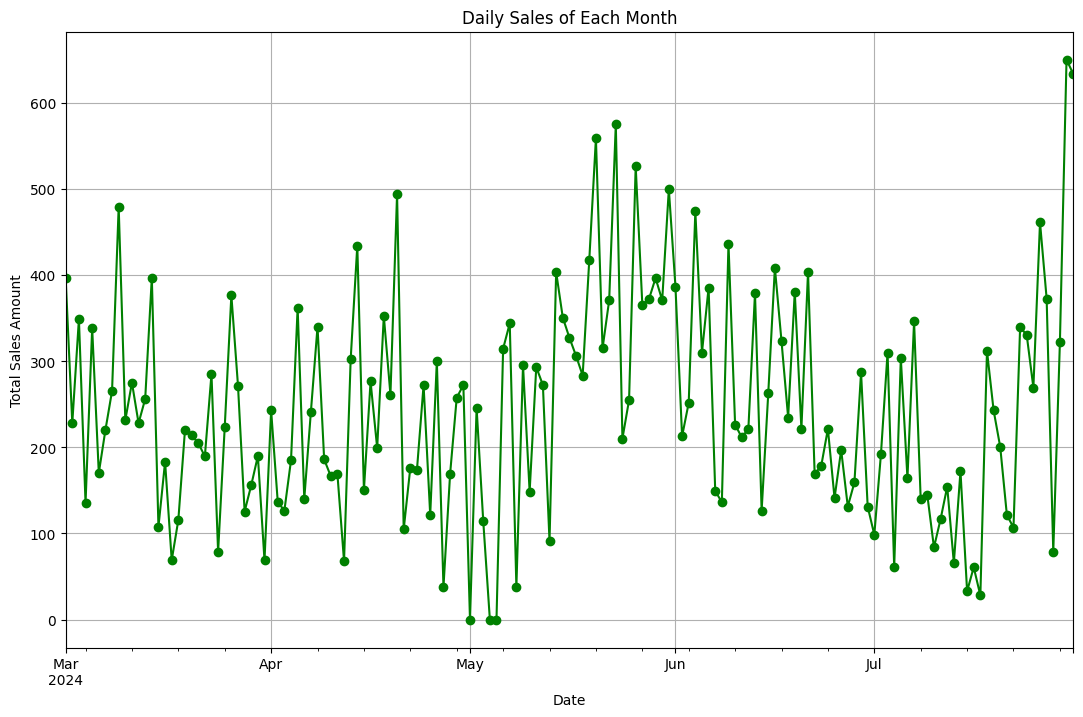

In [ ]:
plt.figure(figsize = (13, 8))
df.set_index('datetime')['money'].resample('D').sum().plot(kind = "line", marker = "o", color = 'green')
plt.title('Daily Sales of Each Month')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

##**Hourly Sales Analysis**

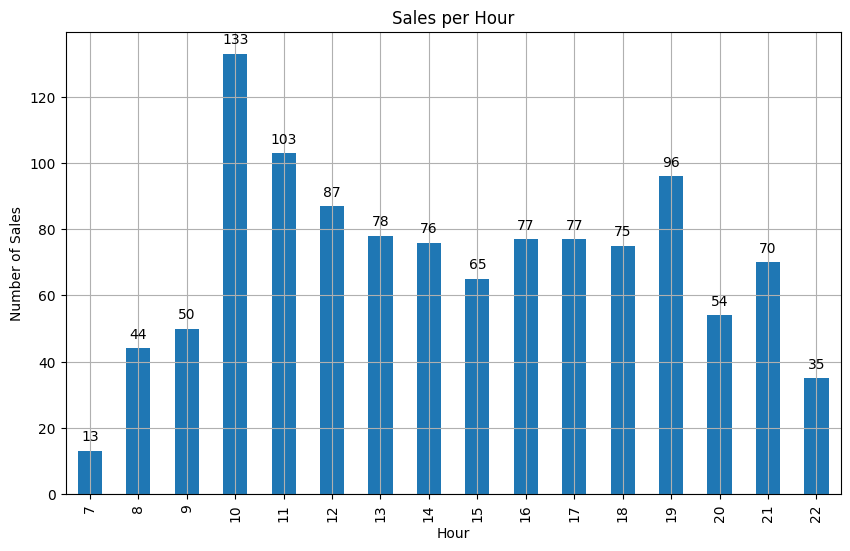

In [ ]:
# Extract the hour from the 'datetime' column if it exists
df['hour'] = df['datetime'].dt.hour

ax = df.groupby('hour').size().plot(kind = "bar", figsize = (10,6))
plt.title('Sales per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

Peak Sales Hours:

●	The highest sales occur at 10 AM, with total sales reaching 133 cups.

●	Another significant peak is observed at 7 PM, with total sales around 96 cups.


Morning Sales Trend:

●	Sales gradually increase from 7 AM to 10 AM, indicating a strong morning coffee rush.

●	After 10 AM, sales start to decline but remain relatively high until around 12 PM.


Afternoon Sales Trend:

● There's a slight rise in sales until 5 PM.

●	Evening Trend: Revenue peaks again at 7 PM, followed by a slow decline with a minor increase at 9 PM before a final dip at 10 PM.


In [ ]:
# Group by hour and coffee type, summing the sales
hourly_sales = df.groupby(['hour', 'coffee_name']).size().unstack(fill_value=0)

# Calculate total cups sold per hour
hourly_sales['Total Cups'] = hourly_sales.sum(axis=1)

# Calculate total amount earned per hour
hourly_sales['Total Amount'] = df.groupby('hour')['money'].sum()

# Display the table
hourly_sales

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,Total Cups,Total Amount
hour,,,,,,,,,,
7,5,4,1,0,1,0,0,2,13,392.80
8,10,7,8,1,6,0,0,12,44,1380.38
9,8,16,6,1,5,3,0,11,50,1515.48
10,20,31,10,4,8,2,7,51,133,4553.18
11,21,25,16,1,13,6,8,13,103,3258.64
12,14,26,15,3,7,6,3,13,87,2850.60
13,18,18,10,2,12,3,4,11,78,2511.60
14,15,18,13,4,6,5,2,13,76,2484.92
15,14,15,8,0,3,4,6,15,65,2158.76


In [ ]:
# Group by hour and coffee name, summing the sales
hourly_sales = df.groupby(['hour', 'coffee_name']).size().unstack(fill_value=0)

# Find the coffee with maximum sales for each hour
max_sales_coffee = hourly_sales.idxmax(axis=1)

# Reset index to make 'hour' a column
max_sales_coffee = max_sales_coffee.reset_index()

# Rename columns
max_sales_coffee = max_sales_coffee.rename(columns={'index': 'Hour', 0: 'Coffee Name'})

# Display the result
max_sales_coffee

,hour,Coffee Name
0,7,Americano
1,8,Latte
2,9,Americano with Milk
3,10,Latte
4,11,Americano with Milk
5,12,Americano with Milk
6,13,Americano
7,14,Americano with Milk
8,15,Americano with Milk
9,16,Americano with Milk


This data shows which coffee was the most popular at different hours of the day.

●	Americano with Milk is the most popular coffee for most of the day, especially in the afternoon (2 PM to 5 PM).

●	Cappuccino is the top choice in the evening (5 PM to 8 PM).

●	Latte is popular in the early morning (8 AM) and mid-morning (10 AM).

●	Americano is preferred during the quieter periods (7 AM, 1 PM).


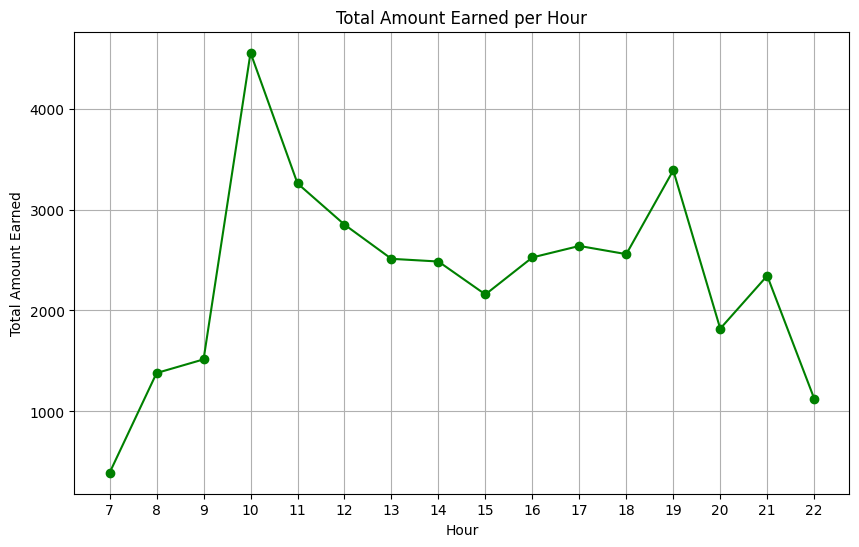

In [ ]:
hourly_sales['Total Amount'] = df.groupby('hour')['money'].sum()
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales.index, hourly_sales['Total Amount'], marker='o', color='green')
plt.xlabel('Hour')
plt.ylabel('Total Amount Earned')
plt.title('Total Amount Earned per Hour')
plt.xticks(hourly_sales.index)
plt.grid(True)
plt.show()

Here's a breakdown of the revenue trends throughout the day:

●	Peak Hours: The highest revenue is generated at 10 AM. Another busy period occurs at 7 PM, although it doesn't reach the same level as the morning rush.

●	Lowest Point: The least revenue is generated at 7 AM.

●	Morning Trend: Revenue steadily increases from 7 AM, peaking at 10 AM before gradually declining until 3 PM.

●	Afternoon Trend: There's a slight rise in revenue until 5 PM.

●	Evening Trend: Revenue peaks again at 7 PM, followed by a slow decline with a minor increase at 9 PM before a final dip at 10 PM.

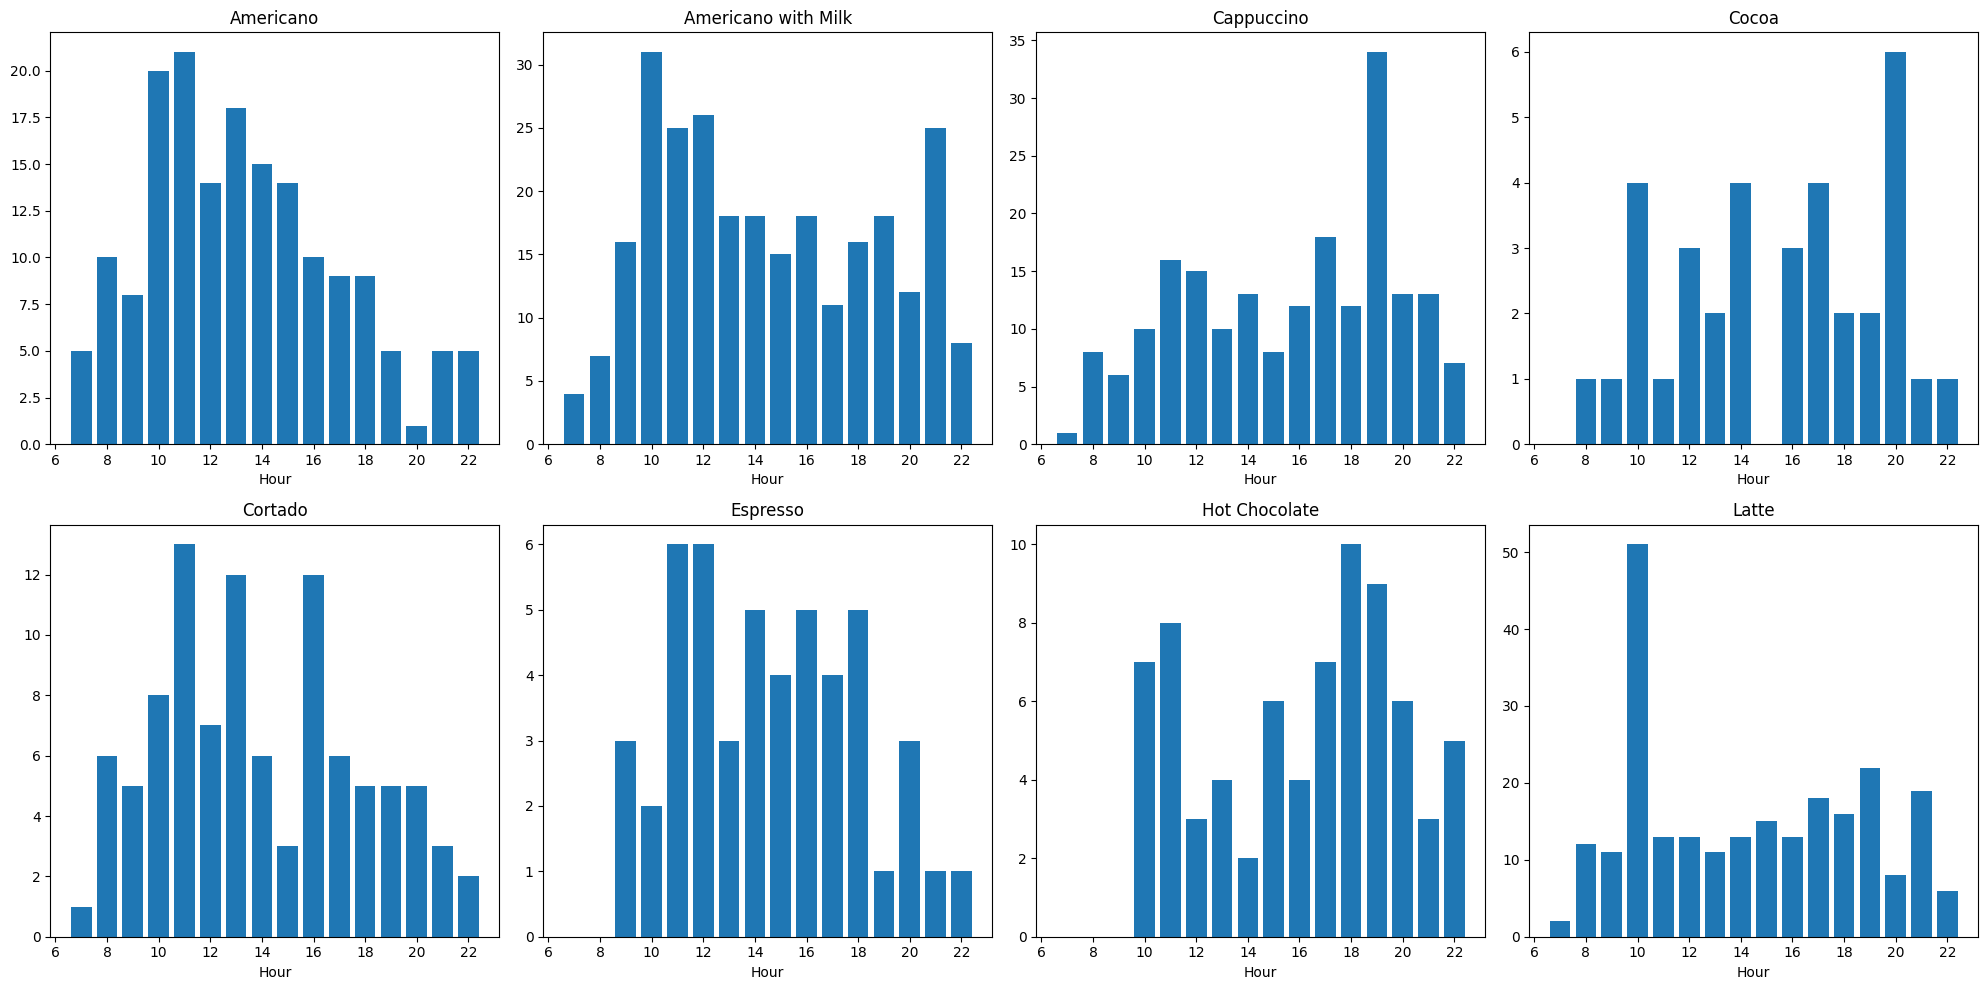

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the array of subplots for easy iteration
axs = axs.flatten()

# Loop through each column in the DataFrame, skipping the 'Index' column
for i, column in enumerate(hourly_sales.columns[:-1]):  # Skip the first column ('Index')
    axs[i].bar(hourly_sales.index, hourly_sales[column]) # Use .index to access the hour values
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
    #axs[i].set_ylabel('Sales')

plt.tight_layout()

# Show the plot
plt.show()

These plots show how many of each coffee were bought throughout the day.

●	All coffees are most popular around 10:00 AM, especially Latte.

●	Cappuccino, Cocoa, and Hot Chocolate are also popular in the evening, between 6:00 PM and 8:00 PM.